In [0]:
%reload_ext autoreload
%autoreload 2

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.basics import *

In [0]:
rossmann_path = Path(base_dir + 'data/rossmann')
rossmann_path.mkdir(parents=True, exist_ok=True)

In [0]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [0]:
path = Config.data_path()/'rossmann'
path.mkdir(parents=True, exist_ok=True)
path
#https://forums.fast.ai/t/platform-colab/28161/208 github link mentioning
#https://github.com/subhobrata/fastai/blob/master/Copy_of_rossman_data_clean.ipynb

PosixPath('/root/.fastai/data/rossmann')

In [0]:
! wget -P {PATH} http://files.fast.ai/part2/lesson14/rossmann.tgz

--2020-04-01 07:27:24--  http://files.fast.ai/part2/lesson14/rossmann.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7730448 (7.4M) [application/x-gtar-compressed]
Saving to: ‘{PATH}/rossmann.tgz.1’

rossmann.tgz.1      100%[===================>]   7.37M  4.49MB/s    in 1.6s    

2020-04-01 07:27:26 (4.49 MB/s) - ‘{PATH}/rossmann.tgz.1’ saved [7730448/7730448]



In [0]:
!tar -xzf {PATH}/rossmann.tgz -C ./data/rossmann/
#!tar -xvf rossmann.tgz -C ./data/rossmann/
#!tar -xzf rossmann.tgz -C ./data/rossmann/

In [7]:
rossmann_path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/test.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/sample_submission.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/train.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/store.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/store_states.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/state_names.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/weather.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/googletrend.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/df'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/joined_test'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/rossmann/joined')]

In [0]:
#path = Config().data_path()/'rossmann'
train_df = pd.read_pickle(rossmann_path/'joined')#train_clean')

In [9]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
...,...,...,...,...,...
StateHoliday_bw,0,0,0,0,0
Promo_bw,5,5,5,5,5
SchoolHoliday_fw,7,1,5,1,1
StateHoliday_fw,0,0,0,0,0


In [10]:
n = len(train_df); n

844338

In [0]:
n = len(train_df); n

844338

### Experimenting with a sample

In [0]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [12]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
61,62,5,NaN,2050.0,61,7495
68,69,5,"Jan,Apr,Jul,Oct",1130.0,54,11204
848,850,5,"Jan,Apr,Jul,Oct",1120.0,61,8380
1592,481,4,"Feb,May,Aug,Nov",7470.0,56,6485
1684,573,4,"Jan,Apr,Jul,Oct",1190.0,59,4298


In [13]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
431565,715,5,NaN,14810.0,48,7005
431710,860,5,NaN,5980.0,79,5783
431959,1110,5,NaN,900.0,45,4499
432192,229,4,"Jan,Apr,Jul,Oct",17410.0,50,9784
433151,76,3,NaN,19960.0,56,8506


In [0]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [15]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
431565,715,5,NaN,14810.0,48,7005
431710,860,5,NaN,5980.0,79,5783
431959,1110,5,NaN,900.0,45,4499
432192,229,4,"Jan,Apr,Jul,Oct",17410.0,50,9784
433151,NaN,3,NaN,19960.0,56,8506


In [16]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [0]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [17]:
small_train_df['PromoInterval'].cat.codes[:5]

61     -1
68      1
848     1
1592    0
1684    1
dtype: int8

In [0]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [19]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
75258,879,2,"Feb,May,Aug,Nov",2460.0,61,2662,True
302940,622,6,NaN,2460.0,79,2618,True
365336,622,2,NaN,2460.0,59,4853,True
377930,879,2,"Feb,May,Aug,Nov",2460.0,62,4112,True


### Preparing full data set

In [0]:
train_df = pd.read_pickle(rossmann_path/'joined')#pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(rossmann_path/'joined_test')#pd.read_pickle(path/'test_clean')

In [21]:
len(train_df),len(test_df)

(844338, 41088)

In [0]:
procs=[FillMissing, Categorify, Normalize]

In [0]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [0]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [25]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [26]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [0]:
valid_idx = range(cut)

In [28]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [0]:
data = (TabularList.from_df(df, path=rossmann_path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=rossmann_path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [30]:
doc(FloatList)

## Model

In [0]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [33]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_runn

In [34]:
len(data.train_ds.cont_names)

16

In [35]:
learn.lr_find()

epoch,train_loss,valid_loss,exp_rmspe,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


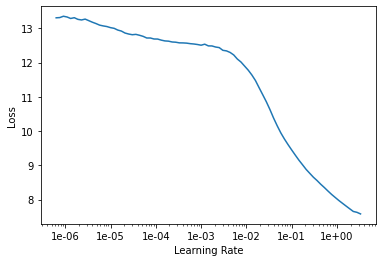

In [36]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.026768,0.019700,0.141825,04:16
1,0.020127,0.022236,0.134988,04:18
2,0.017496,0.020903,0.131165,04:23
3,0.012530,0.013173,0.109400,04:21
4,0.011102,0.012019,0.105000,04:14


In [0]:
learn.save('1')

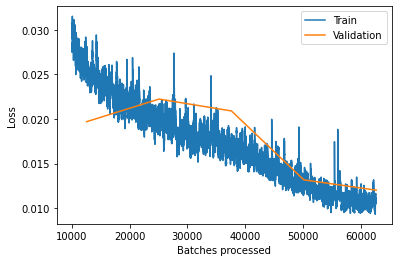

In [39]:
learn.recorder.plot_losses(skip_start=10000)

In [0]:
learn.load('1');

In [41]:
learn.fit_one_cycle(4, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.012424,0.015309,0.124211,04:14
1,0.012859,0.024725,0.118580,04:18
2,0.011011,0.025685,0.111867,04:17
3,0.010185,0.014939,0.106924,04:11


In [42]:
learn.fit_one_cycle(3, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.013193,0.014392,0.113332,04:13
1,0.010311,0.018750,0.116931,04:13
2,0.009345,0.013404,0.113668,04:14


(10th place in the competition was 0.108)

In [43]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)